<a href="https://colab.research.google.com/github/lee-seong-wook/ML-DL-study/blob/main/%ED%98%BC%EA%B3%B5%ED%8C%8C_%ED%95%A9%EC%84%B1%EA%B3%B1_%EC%8B%A0%EA%B2%BD%EB%A7%9D_%EC%9D%B4%EB%AF%B8%EC%A7%80_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target),(test_input, test_target) =\
keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28,1) /255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                              padding='same',input_shape=(28,28,1)))

In [ ]:
model.add(keras.layers.MaxPooling2D(2))

In [ ]:
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu',
                              padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [ ]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

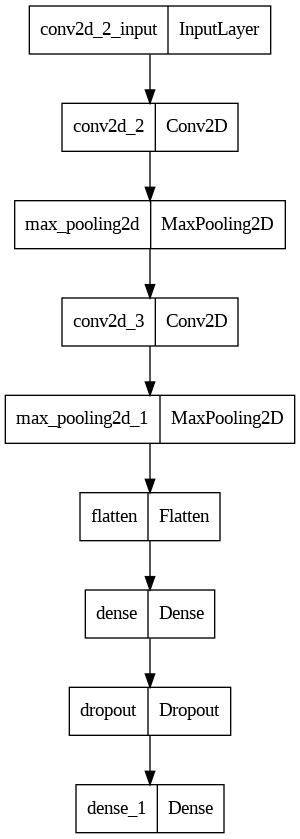

In [ ]:
keras.utils.plot_model(model)

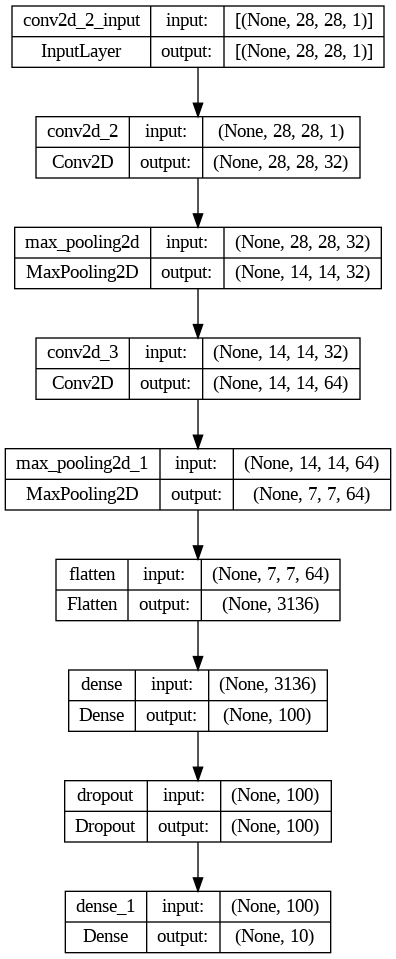

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.compile(optimizer ='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')
checkpoint_cb= keras.callbacks.ModelCheckpoint('best-cnn-model.h5',
                                               save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 16s 4ms/step - loss: 0.5368 - accuracy: 0.8092 - val_loss: 0.3356 - val_accuracy: 0.8767
Epoch 2/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3537 - accuracy: 0.8736 - val_loss: 0.2932 - val_accuracy: 0.8906
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3029 - accuracy: 0.8918 - val_loss: 0.2541 - val_accuracy: 0.9060
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2704 - accuracy: 0.9021 - val_loss: 0.2382 - val_accuracy: 0.9129
Epoch 5/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2454 - accuracy: 0.9114 - val_loss: 0.2359 - val_accuracy: 0.9130
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2242 - accuracy: 0.9188 - val_loss: 0.2233 - val_accuracy: 0.9177
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2044 - accuracy: 0.9252 - val_loss: 0.2613 - val_accuracy

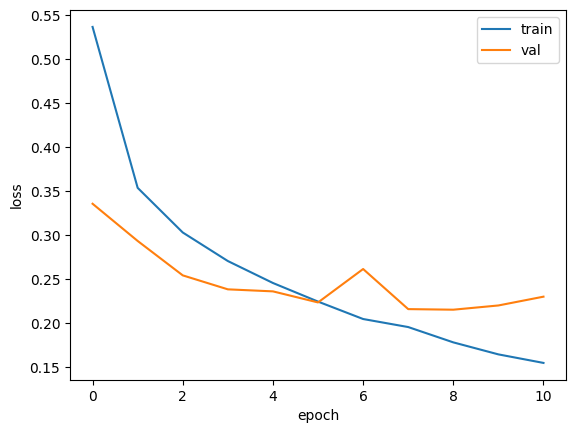

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [ ]:
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.2150 - accuracy: 0.9251


[0.2150312066078186, 0.925083339214325]

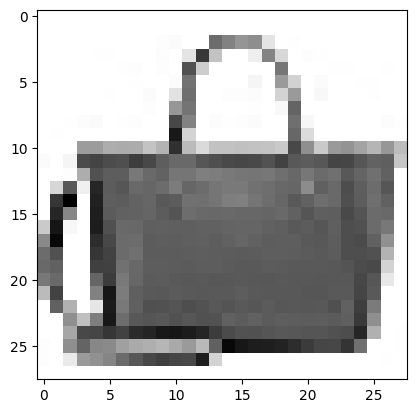

In [ ]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [ ]:
preds= model.predict(val_scaled[0:1])
print(preds)

1/1 [==============================] - 0s 158ms/step
[[1.02619656e-16 1.53148805e-21 1.34273251e-18 9.52138758e-14
  3.29463060e-17 3.57025128e-16 9.10992372e-18 3.10142168e-19
  1.00000000e+00 5.62117875e-19]]


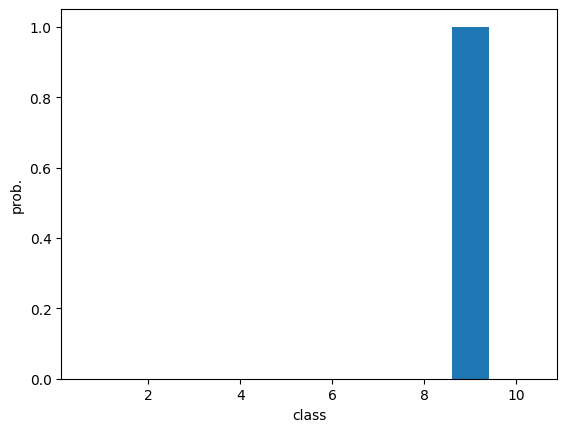

In [ ]:
plt.bar(range(1,11),preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()